In [1]:
from keras.datasets import mnist

In [2]:
dataset=mnist.load_data('mnist.db')

11493376/11490434 [==============================] - 2s 0us/step


In [4]:
# partioning dataset in train and test data(tuple unpacking)
train,test=dataset

In [6]:
len(train)

2

In [5]:
X_train, y_train = train
X_test, y_test = test

In [7]:
len(X_train)

60000

In [81]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
len(X_test)

10000

In [69]:
X_train = X_train.reshape(-1,28*28)


In [35]:
X_train.shape

(60000, 784)

In [65]:
import matplotlib.pyplot as plt

In [70]:
img= X_train[300]

In [78]:
img.shape

(1, 784)

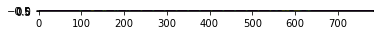

In [79]:
plt.imshow(img)

In [36]:
y_train.shape

(60000,)

In [37]:
#we have 10 classes from (0..9)
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [38]:
 from keras.utils.np_utils import to_categorical

In [49]:
y_train_cat=to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [42]:
from keras import Sequential
model = Sequential()

In [43]:
from keras.layers import Dense
model.add(
    Dense(
        input_shape=(784,),
        units=512,
        activation='relu',
    )
)

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
Total params: 401,920
Trainable params: 401,920
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.add(
    Dense(
        units=256,
        activation='relu',
        
    )
)
model.add(
    Dense(
        units=128,
        activation='relu',
        
    )
)
model.add(
    Dense(
        units=64,
        activation='relu',
       
    )
)
model.add(
    Dense(
        units=32,
        activation='relu',
       
    )
)
model.add(
    Dense(
        units=10,
        activation='softmax',
        
    )
)

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2

In [53]:
from keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

In [54]:
#accuracy is less so do some modifications in hyper parameter
model.fit(X_train,y_train_cat,epochs=50)

Epoch 1/50
1875/1875 [==============================] - 16s 9ms/step - loss: 1.7024 - accuracy: 0.3429
Epoch 2/50
1875/1875 [==============================] - 17s 9ms/step - loss: 1.4901 - accuracy: 0.4302
Epoch 3/50
1875/1875 [==============================] - 16s 8ms/step - loss: 1.3440 - accuracy: 0.4805
Epoch 4/50
1875/1875 [==============================] - 17s 9ms/step - loss: 1.3913 - accuracy: 0.4636
Epoch 5/50
1875/1875 [==============================] - 17s 9ms/step - loss: 1.6665 - accuracy: 0.3496
Epoch 6/50
1875/1875 [==============================] - 16s 9ms/step - loss: 1.9786 - accuracy: 0.2310
Epoch 7/50
1875/1875 [==============================] - 16s 9ms/step - loss: 2.0459 - accuracy: 0.1938
Epoch 8/50
1875/1875 [==============================] - 16s 9ms/step - loss: 2.0079 - accuracy: 0.2024
Epoch 9/50
1875/1875 [==============================] - 19s 10ms/step - loss: 2.0072 - accuracy: 0.2047
Epoch 10/50
1875/1875 [==============================] - 18s 9ms/step - 

In [55]:
import pandas as pd

In [56]:
loss = pd.DataFrame(model.history.history['loss'])
accuracy = pd.DataFrame(model.history.history['accuracy'])

<AxesSubplot:>

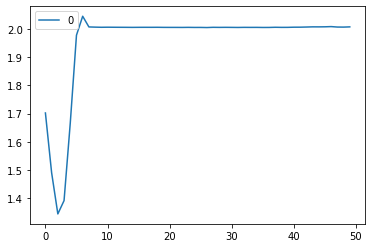

In [57]:
loss.plot()

<AxesSubplot:>

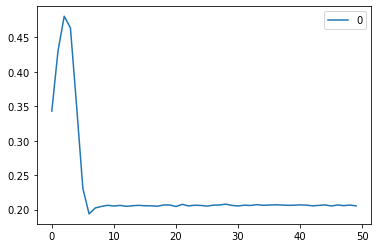

In [58]:
accuracy.plot()

In [59]:
X_test_1d = X_test.reshape(-1,28*28)

In [60]:
predicted_data = model.predict(X_test_1d)

In [62]:
predicted_data[1]

array([0.10747045, 0.01071547, 0.11270999, 0.11096365, 0.10952052,
       0.10064095, 0.11001694, 0.11745883, 0.10795572, 0.11254743],
      dtype=float32)

In [63]:
sum = 0
for i in predicted_data[1]:
    sum = sum + i

In [64]:
sum

0.9999999450519681